In [1]:
#if (!requireNamespace("BiocManager", quietly=TRUE))
 #   install.packages("BiocManager")
#BiocManager::install("DEP")
##https://bioconductor.org/packages/devel/bioc/vignettes/DEP/inst/doc/DEP.html
library("DEP")

Warning message in fun(libname, pkgname):
“mzR has been built against a different Rcpp version (1.0.9)
than is installed on your system (1.0.10). This might lead to errors
when loading mzR. If you encounter such issues, please send a report,
including the output of sessionInfo() to the Bioc support forum at 
https://support.bioconductor.org/. For details see also
https://github.com/sneumann/mzR/wiki/mzR-Rcpp-compiler-linker-issue.”


**About the dataset: Ubiquitin interactors**

The following DEP example is on a proteomics dataset where Ubiquitin-protein interactors were characterized (Zhang et al. Mol Cell 2017). The raw mass spectrometry data were first analyzed using MaxQuant (Cox and Mann, Nat Biotech 2007) and the resulting “proteinGroups.txt” file is used as input for the downstream analysis.


In [2]:
# Loading a package required for data handling
library("dplyr")

# The data is provided with the package
data <- UbiLength

# We filter for contaminant proteins and decoy database hits, which are indicated by "+" in the columns "Potential.contaminants" and "Reverse", respectively. 
data <- filter(data, Reverse != "+", Potential.contaminant != "+")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
head(data,4)

,Protein.IDs,Majority.protein.IDs,Protein.names,Gene.names,Fasta.headers,Peptides,Razor...unique.peptides,Unique.peptides,LFQ.intensity.Ubi4_1,LFQ.intensity.Ubi4_2,⋯,LFQ.intensity.Ubi6_3,LFQ.intensity.Ctrl_1,LFQ.intensity.Ctrl_2,LFQ.intensity.Ctrl_3,LFQ.intensity.Ubi1_1,LFQ.intensity.Ubi1_2,LFQ.intensity.Ubi1_3,Only.identified.by.site,Reverse,Potential.contaminant
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,A0AV96-2;B7Z8Z7;A0AV96;D6R9D6;D6RBS9;D6REZ6;D6R9M7;D6RCT1;D6RBP6;D6RA49;D6RFL5;Q5T0W7;Q8TBY0-2;Q8TBY0-3;Q9NQ94-5;Q8TBY0;Q9NQ94-6;Q9NQ94-3;Q9NQ94-2;F8W9F8;Q9NQ94-4;Q9NQ94,A0AV96-2;B7Z8Z7;A0AV96;D6R9D6;D6RBS9,RNA-binding protein 47,RBM47,>sp|A0AV96-2|RBM47_HUMAN Isoform 2 of RNA-binding protein 47 OS=Homo sapiens GN=RBM47;>tr|B7Z8Z7|B7Z8Z7_HUMAN RNA-binding protein 47 OS=Homo sapiens GN=RBM47 PE=2 SV=1;>sp|A0AV96|RBM47_HUMAN RNA-binding protein 47 OS=Homo sapiens GN=RBM47 PE=1 SV=2;>tr|D6R,7,7,7,35787000,24701000,⋯,32705000,25898000,31275000,23076000,27664000,32314000,31097000,,,
2,A0AVT1;A0AVT1-2;H0Y8S8;A0AVT1-4;A0AVT1-3,A0AVT1;A0AVT1-2,Ubiquitin-like modifier-activating enzyme 6,UBA6,>sp|A0AVT1|UBA6_HUMAN Ubiquitin-like modifier-activating enzyme 6 OS=Homo sapiens GN=UBA6 PE=1 SV=1;>sp|A0AVT1-2|UBA6_HUMAN Isoform 2 of Ubiquitin-like modifier-activating enzyme 6 OS=Homo sapiens GN=UBA6,6,6,6,0,0,⋯,0,7260800,8612300,7816000,9907700,12387000,9023800,,,
3,A1L0T0;M0R026;E9PL44;E9PJS0;M0R1B5,A1L0T0;M0R026,Acetolactate synthase-like protein,ILVBL,>sp|A1L0T0|ILVBL_HUMAN Acetolactate synthase-like protein OS=Homo sapiens GN=ILVBL PE=1 SV=2;>tr|M0R026|M0R026_HUMAN Acetolactate synthase-like protein OS=Homo sapiens GN=ILVBL PE=1 SV=1,5,5,5,0,0,⋯,0,29905000,15926000,24390000,26683000,22254000,26705000,,,
4,A1XBS5-5;E5RHK0;F8W7P5;E5RGD0;H0YC32;A1XBS5-2;A1XBS5-4;A1XBS5-3;A1XBS5,A1XBS5-5;E5RHK0;F8W7P5;E5RGD0;H0YC32;A1XBS5-2;A1XBS5-4;A1XBS5-3;A1XBS5,Protein FAM92A1,FAM92A1,>sp|A1XBS5-5|F92A1_HUMAN Isoform 5 of Protein FAM92A1 OS=Homo sapiens GN=FAM92A1;>tr|E5RHK0|E5RHK0_HUMAN Protein FAM92A1 OS=Homo sapiens GN=FAM92A1 PE=4 SV=1;>tr|F8W7P5|F8W7P5_HUMAN Protein FAM92A1 OS=Homo sapiens GN=FAM92A1 PE=4 SV=1;>tr|E5RGD0|E5RGD0_HUM,1,1,1,0,0,⋯,0,0,0,0,0,0,7675300,+,,


In [5]:
dim(data)


[1] 2941   23

In [6]:
colnames(data)


[1] "Protein.IDs"             "Majority.protein.IDs"   
 [3] "Protein.names"           "Gene.names"             
 [5] "Fasta.headers"           "Peptides"               
 [7] "Razor...unique.peptides" "Unique.peptides"        
 [9] "LFQ.intensity.Ubi4_1"    "LFQ.intensity.Ubi4_2"   
[11] "LFQ.intensity.Ubi4_3"    "LFQ.intensity.Ubi6_1"   
[13] "LFQ.intensity.Ubi6_2"    "LFQ.intensity.Ubi6_3"   
[15] "LFQ.intensity.Ctrl_1"    "LFQ.intensity.Ctrl_2"   
[17] "LFQ.intensity.Ctrl_3"    "LFQ.intensity.Ubi1_1"   
[19] "LFQ.intensity.Ubi1_2"    "LFQ.intensity.Ubi1_3"   
[21] "Only.identified.by.site" "Reverse"                
[23] "Potential.contaminant"

In [7]:
# Are there any duplicated gene names?
data$Gene.names %>% duplicated() %>% any()


[1] TRUE

In [8]:
# Make a table of duplicated gene names
data %>% group_by(Gene.names) %>% summarize(frequency = n()) %>% 
  arrange(desc(frequency)) %>% filter(frequency > 1)


Gene.names,frequency
<chr>,<int>
,7
ATXN2,4
ATXN2L,4
SF1,4
HSPA8,3
RBM33,3
UGP2,3
ACTL6A,2
BCLAF1,2


In [9]:
# Make unique names using the annotation in the "Gene.names" column as primary names and the annotation in "Protein.IDs" as name for those that do not have an gene name.
data_unique <- make_unique(data, "Gene.names", "Protein.IDs", delim = ";")

# Are there any duplicated names?
data$name %>% duplicated() %>% any()


[1] FALSE

In [10]:
# Generate a SummarizedExperiment object using an experimental design
LFQ_columns <- grep("LFQ.", colnames(data_unique)) # get LFQ column numbers
experimental_design <- UbiLength_ExpDesign
data_se <- make_se(data_unique, LFQ_columns, experimental_design)

In [11]:
# Generate a SummarizedExperiment object by parsing condition information from the column names
LFQ_columns <- grep("LFQ.", colnames(data_unique)) # get LFQ column numbers
data_se_parsed <- make_se_parse(data_unique, LFQ_columns)


In [12]:
# Let's have a look at the SummarizedExperiment object
data_se


class: SummarizedExperiment 
dim: 2941 12 
metadata(0):
assays(1): ''
rownames(2941): RBM47 UBA6 ... ATXN2.3 X6RHB9
rowData names(13): Protein.IDs Majority.protein.IDs ... name ID
colnames(12): Ubi4_1 Ubi4_2 ... Ubi1_2 Ubi1_3
colData names(4): label ID condition replicate

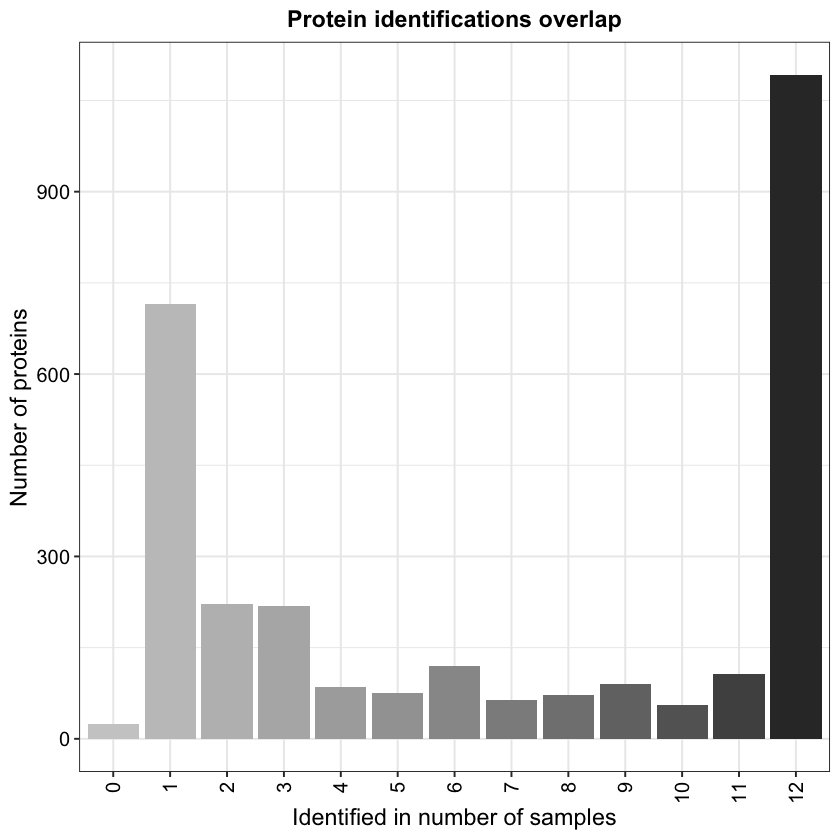

In [13]:
# Plot a barplot of the protein identification overlap between samples
plot_frequency(data_se)


In [14]:
# Filter for proteins that are identified in all replicates of at least one condition
data_filt <- filter_missval(data_se, thr = 0)

# Less stringent filtering:
# Filter for proteins that are identified in 2 out of 3 replicates of at least one condition
data_filt2 <- filter_missval(data_se, thr = 1)


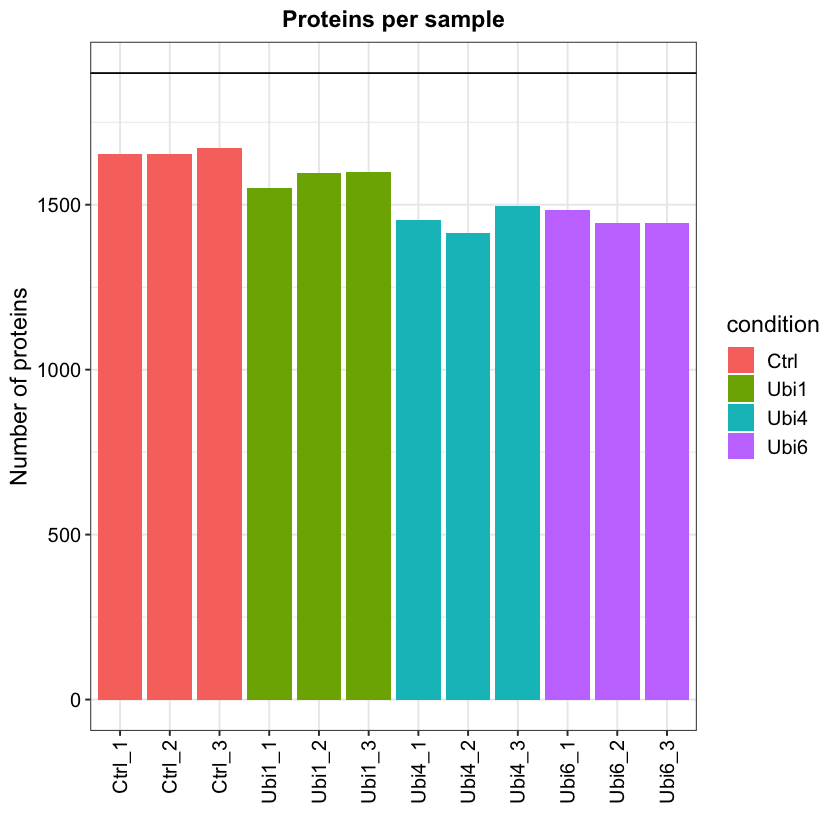

In [15]:
# Plot a barplot of the number of identified proteins per samples
plot_numbers(data_filt)


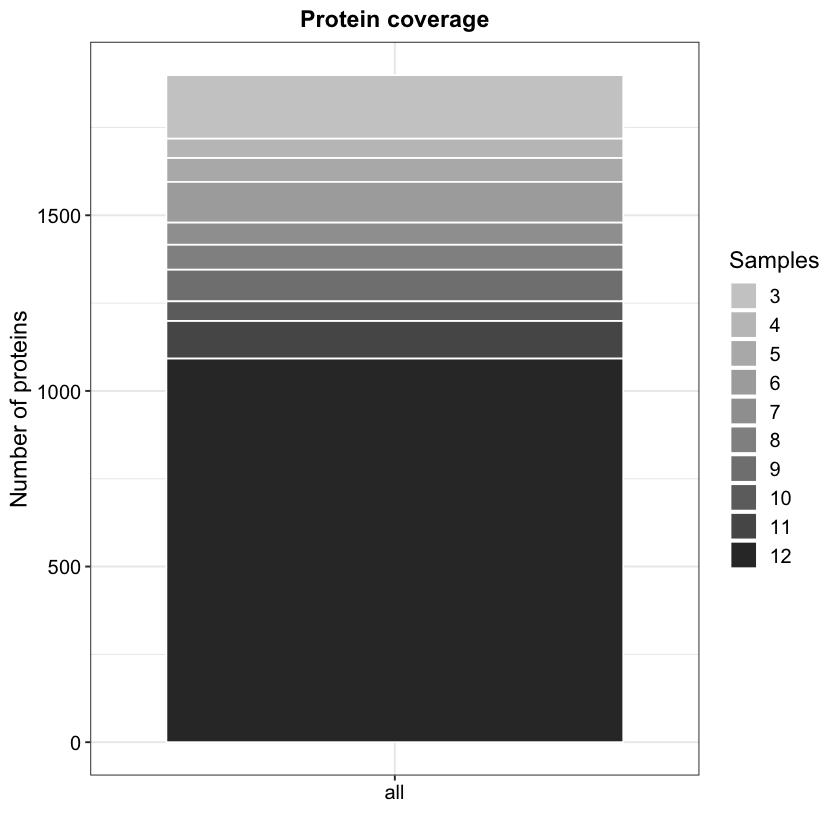

In [16]:
# Plot a barplot of the protein identification overlap between samples
plot_coverage(data_filt)


In [17]:
# Normalize the data
data_norm <- normalize_vsn(data_filt)


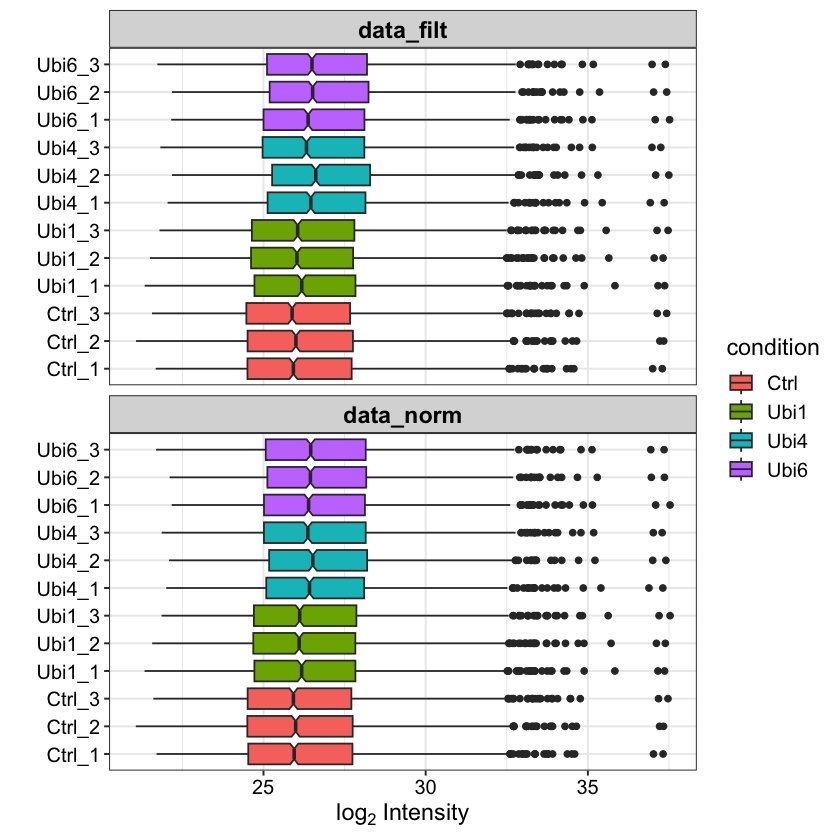

In [18]:
# Visualize normalization by boxplots for all samples before and after normalization
plot_normalization(data_filt, data_norm)


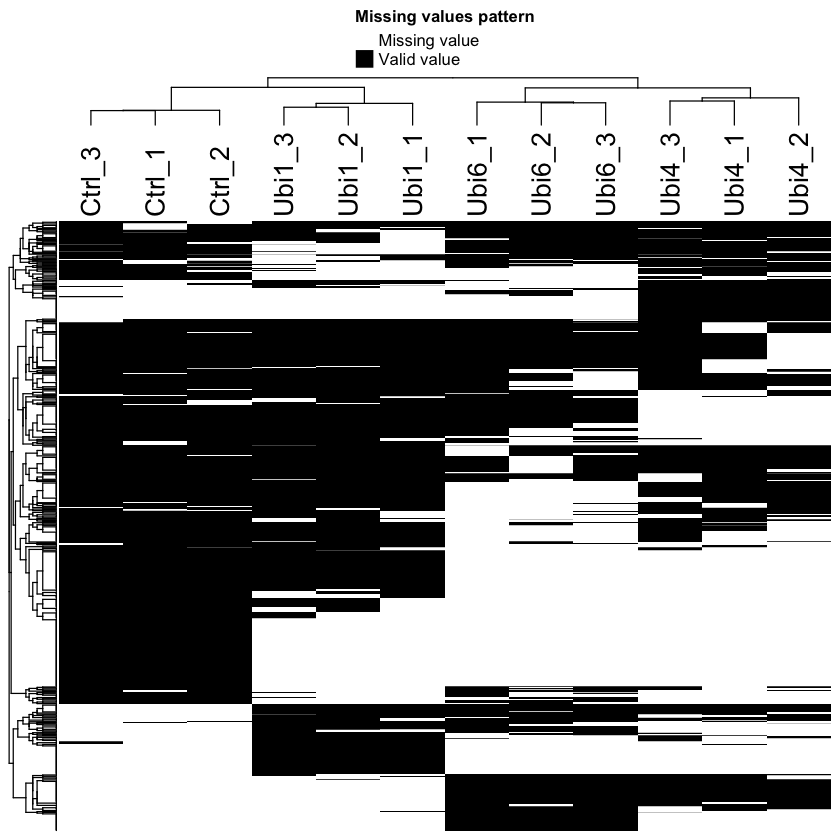

In [19]:
# Plot a heatmap of proteins with missing values
plot_missval(data_filt)


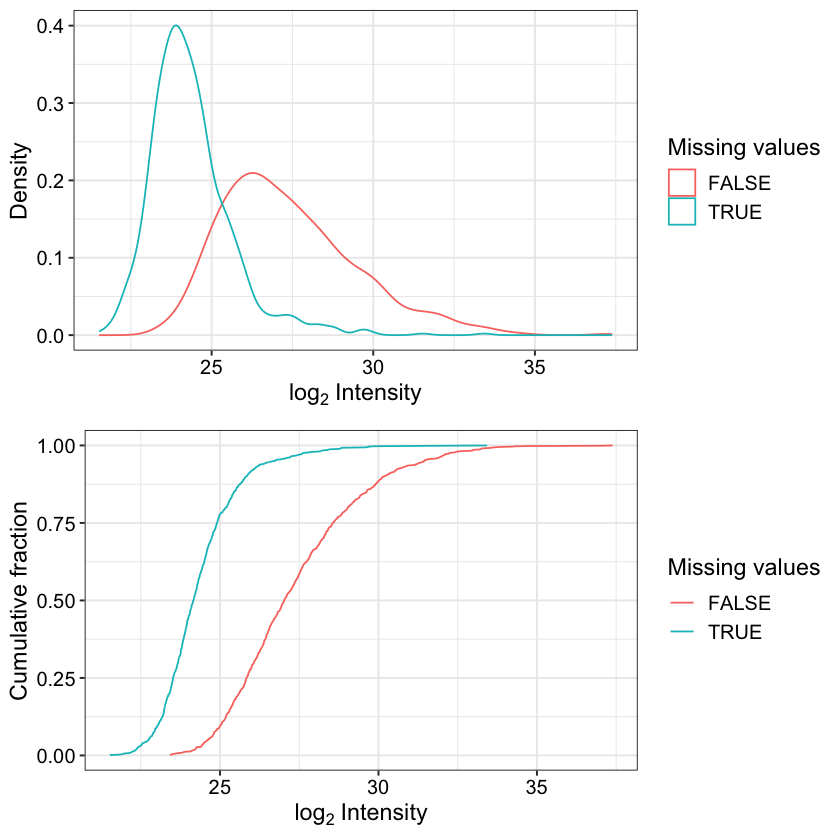

In [20]:
# Plot intensity distributions and cumulative fraction of proteins with and without missing values
plot_detect(data_filt)


In [25]:
# All possible imputation methods are printed in an error, if an invalid function name is given.
#impute(data_norm, fun = " ")


In [26]:
# Impute missing data using random draws from a Gaussian distribution centered around a minimal value (for MNAR)
data_imp <- impute(data_norm, fun = "MinProb", q = 0.01)


[1] 0.2608395


In [27]:
# Impute missing data using random draws from a manually defined left-shifted Gaussian distribution (for MNAR)
data_imp_man <- impute(data_norm, fun = "man", shift = 1.8, scale = 0.3)


In [28]:
# Impute missing data using the k-nearest neighbour approach (for MAR)
data_imp_knn <- impute(data_norm, fun = "knn", rowmax = 0.9)


Cluster size 1899 broken into 1283 616 
Done cluster 1283 
Done cluster 616 


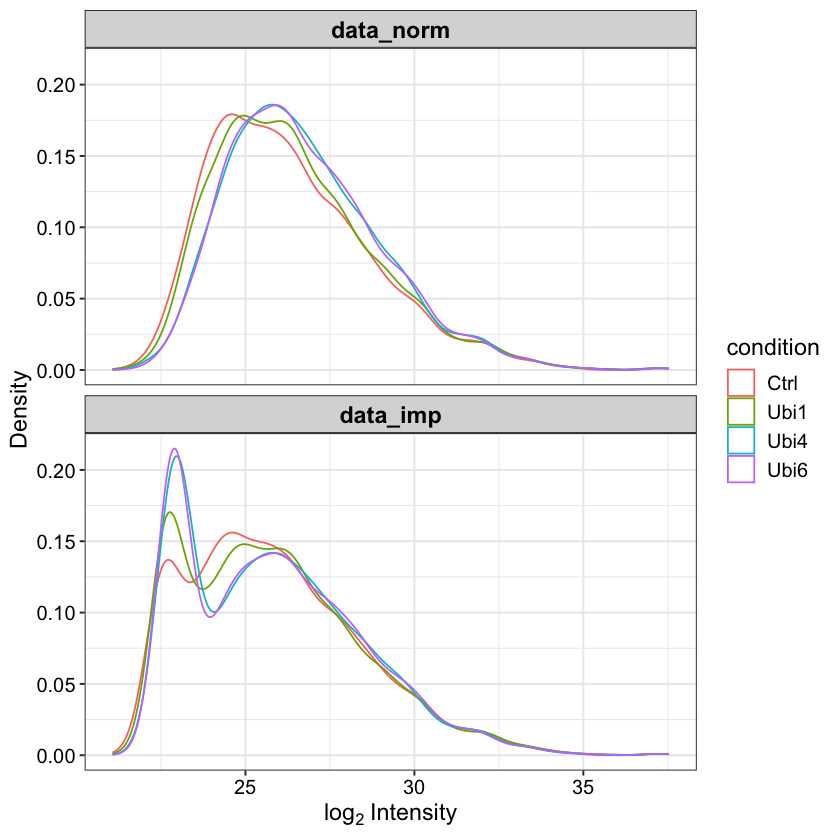

In [29]:
# Plot intensity distributions before and after imputation
plot_imputation(data_norm, data_imp)


In [30]:
# Differential enrichment analysis  based on linear models and empherical Bayes statistics

# Test every sample versus control
data_diff <- test_diff(data_imp, type = "control", control = "Ctrl")


Tested contrasts: Ubi4_vs_Ctrl, Ubi6_vs_Ctrl, Ubi1_vs_Ctrl



In [31]:
# Test all possible comparisons of samples
data_diff_all_contrasts <- test_diff(data_imp, type = "all")


Tested contrasts: Ubi4_vs_Ubi6, Ubi4_vs_Ctrl, Ubi4_vs_Ubi1, Ubi6_vs_Ctrl, Ubi6_vs_Ubi1, Ctrl_vs_Ubi1



In [32]:
# Test manually defined comparisons
data_diff_manual <- test_diff(data_imp, type = "manual", 
                              test = c("Ubi4_vs_Ctrl", "Ubi6_vs_Ctrl"))


Tested contrasts: Ubi4_vs_Ctrl, Ubi6_vs_Ctrl



In [33]:
# Denote significant proteins based on user defined cutoffs
dep <- add_rejections(data_diff, alpha = 0.05, lfc = log2(1.5))


Warning message:
“Use of `pca_df[[indicate[1]]]` is discouraged.
ℹ Use `.data[[indicate[1]]]` instead.”
Warning message:
“Use of `pca_df[[indicate[2]]]` is discouraged.
ℹ Use `.data[[indicate[2]]]` instead.”


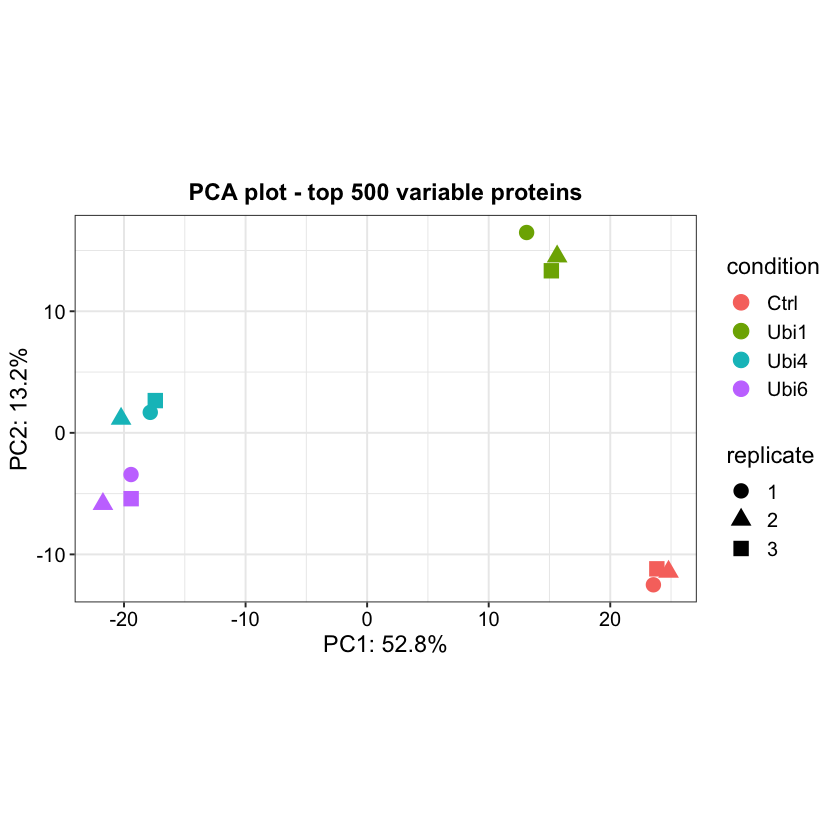

In [34]:
# Plot the first and second principal components
plot_pca(dep, x = 1, y = 2, n = 500, point_size = 4)


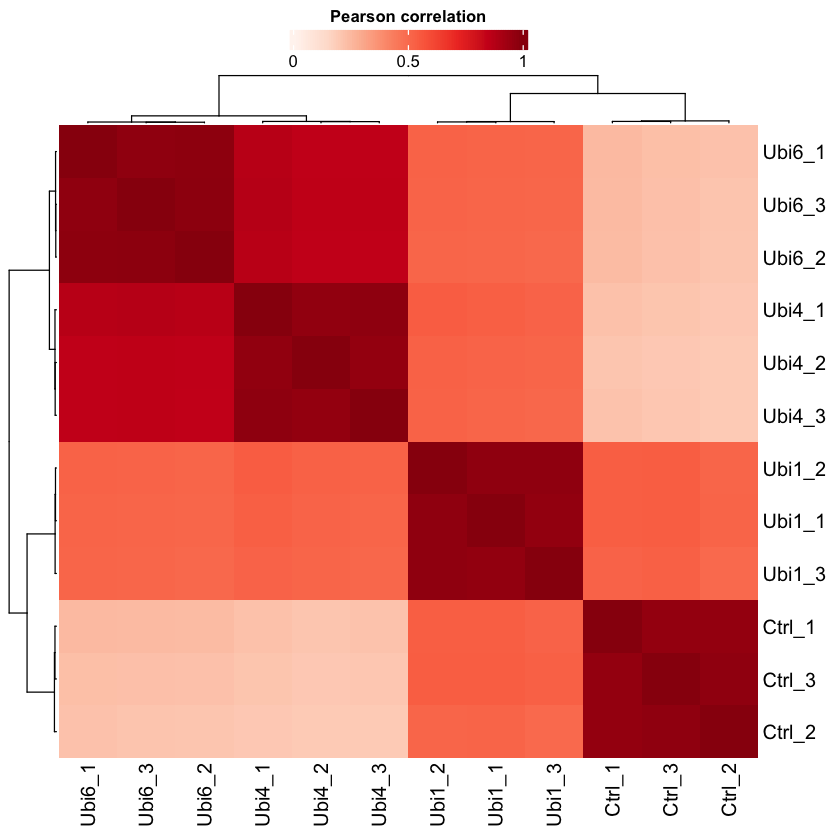

In [35]:
# Plot the Pearson correlation matrix
plot_cor(dep, significant = TRUE, lower = 0, upper = 1, pal = "Reds")


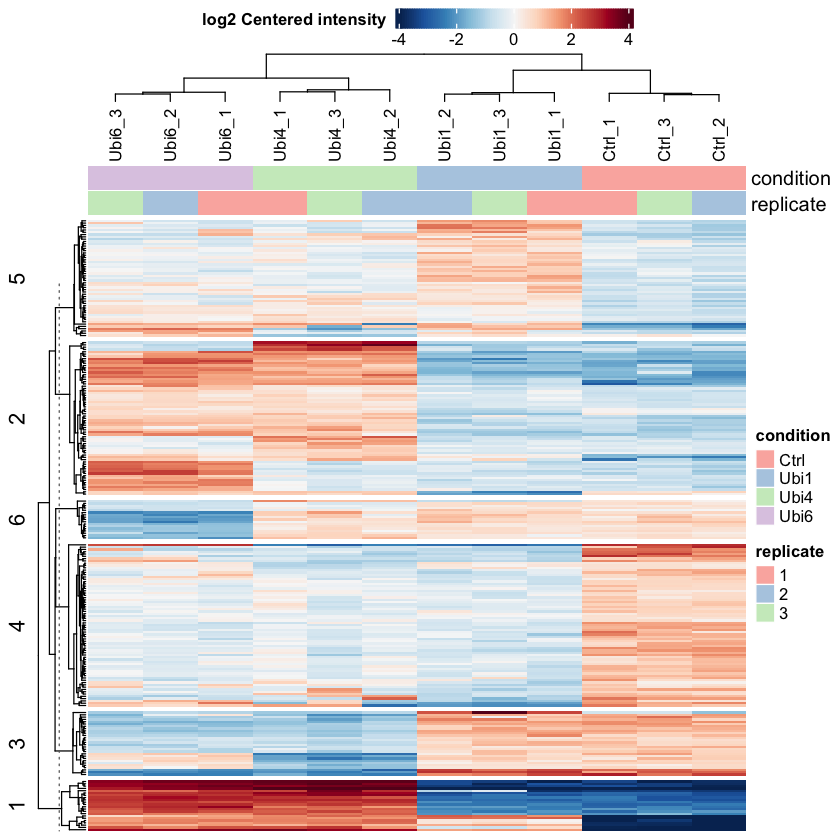

In [36]:
# Plot a heatmap of all significant proteins with the data centered per protein
plot_heatmap(dep, type = "centered", kmeans = TRUE, 
             k = 6, col_limit = 4, show_row_names = FALSE,
             indicate = c("condition", "replicate"))


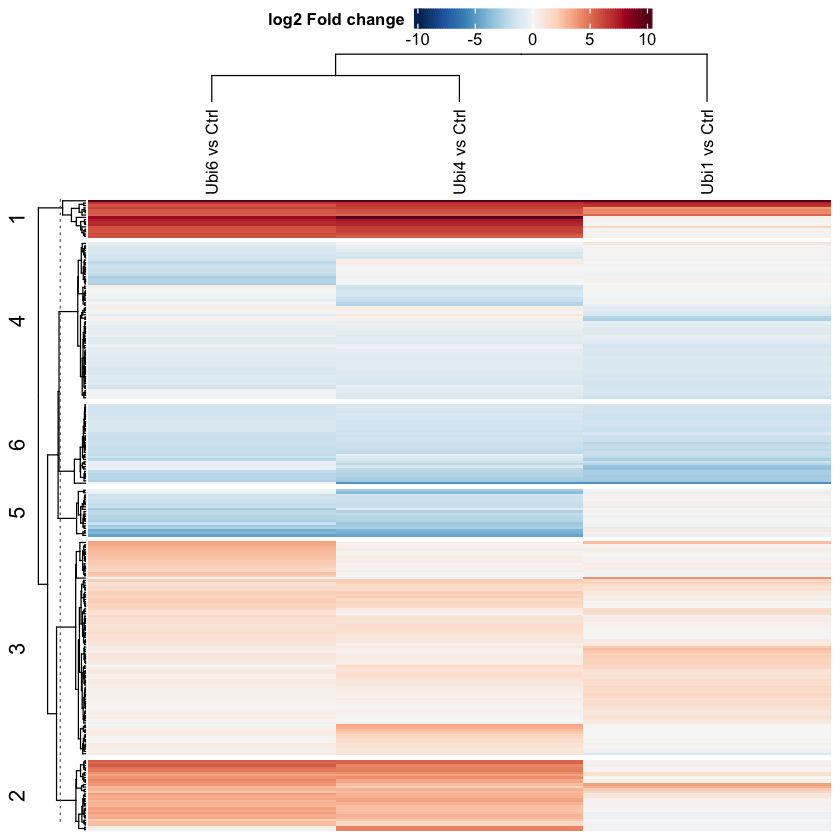

In [37]:
# Plot a heatmap of all significant proteins (rows) and the tested contrasts (columns)
plot_heatmap(dep, type = "contrast", kmeans = TRUE, 
             k = 6, col_limit = 10, show_row_names = FALSE)


Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


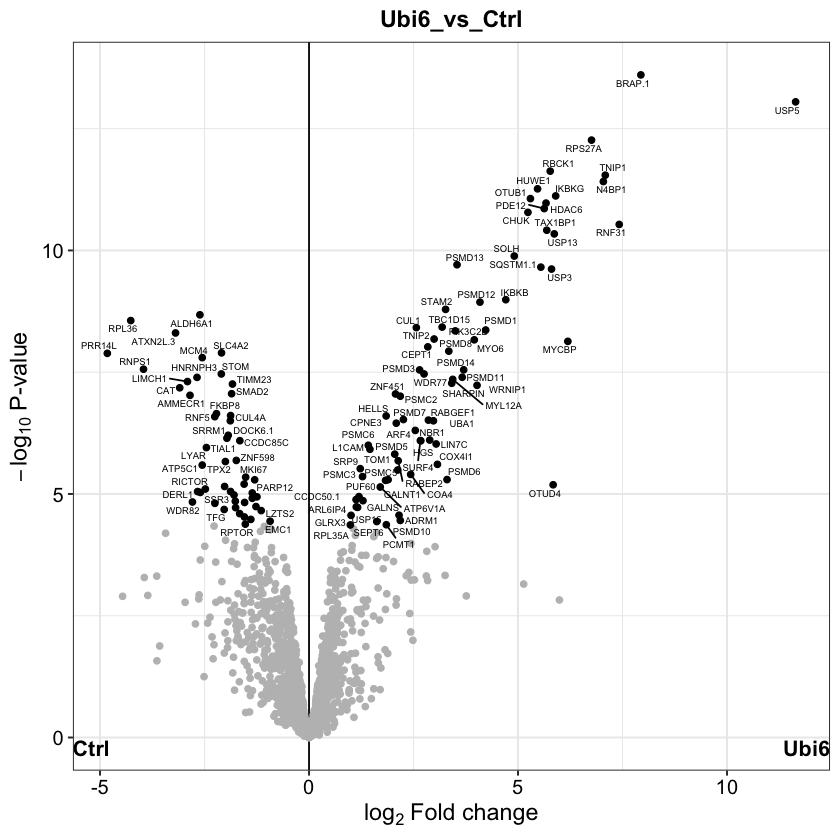

In [38]:
# Plot a volcano plot for the contrast "Ubi6 vs Ctrl""
plot_volcano(dep, contrast = "Ubi6_vs_Ctrl", label_size = 2, add_names = TRUE)


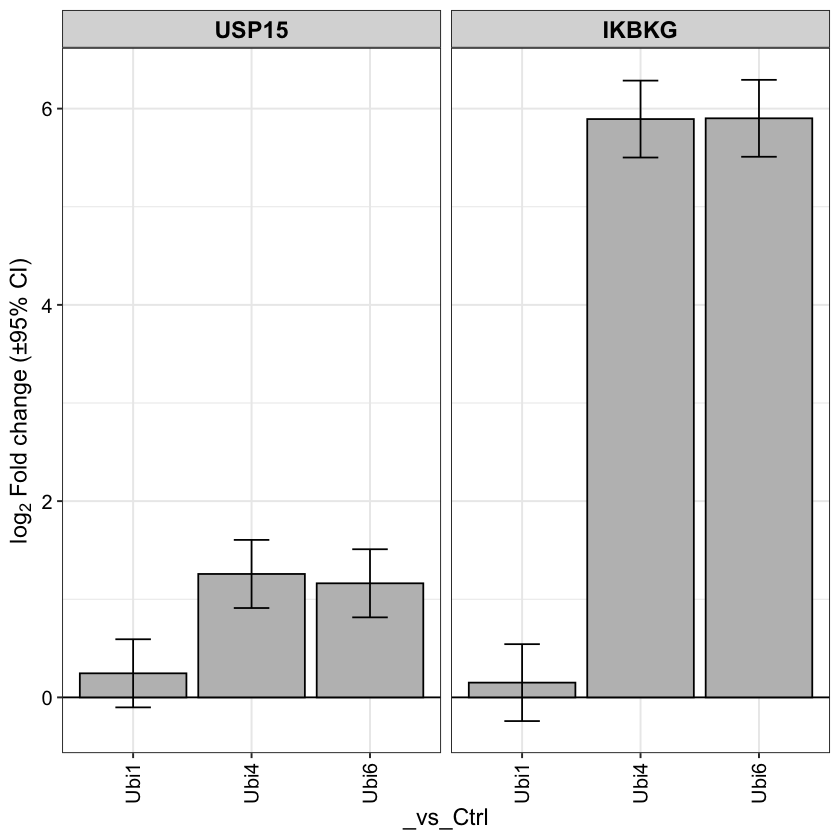

In [39]:
# Plot a barplot for USP15 and IKBKG
plot_single(dep, proteins = c("USP15", "IKBKG"))


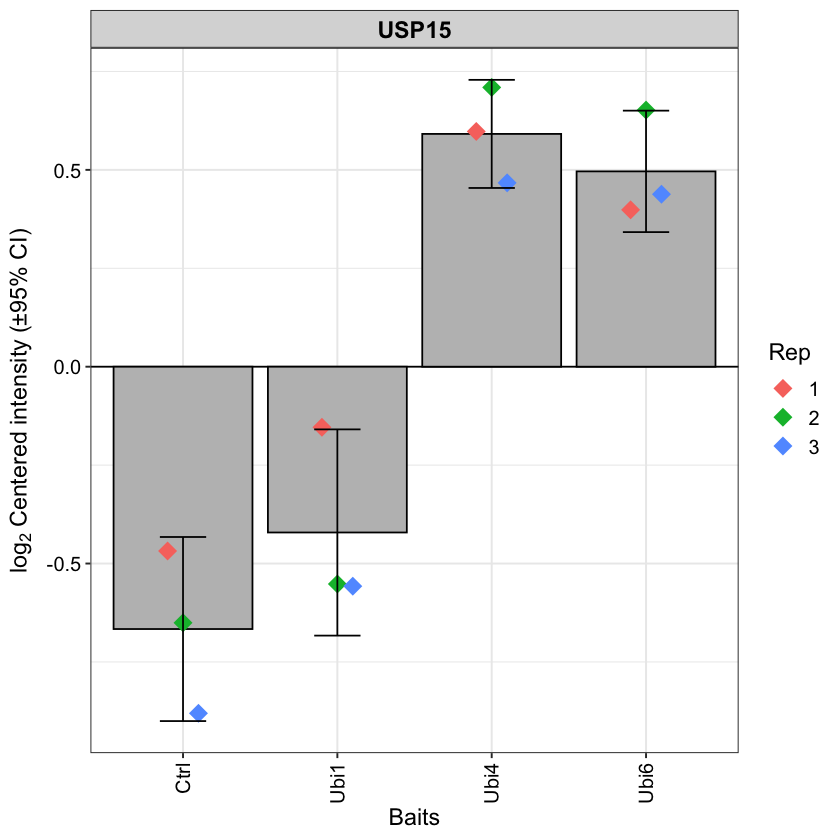

In [40]:
# Plot a barplot for the protein USP15 with the data centered
plot_single(dep, proteins = "USP15", type = "centered")


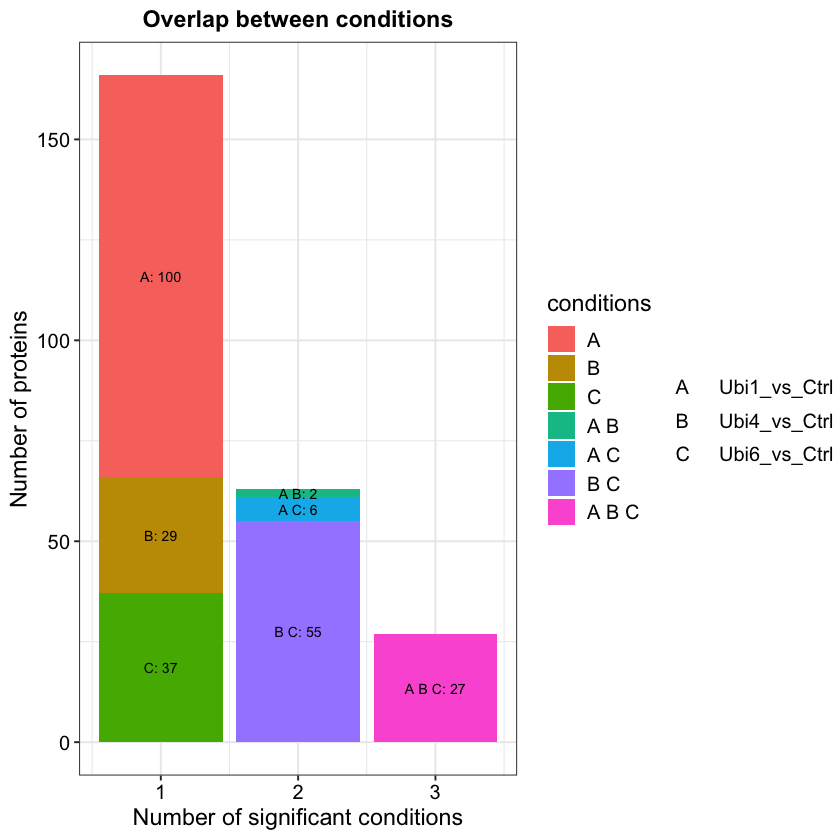

In [41]:
# Plot a frequency plot of significant proteins for the different conditions
plot_cond(dep)


In [42]:
# Generate a results table
data_results <- get_results(dep)


In [43]:
# Number of significant proteins
data_results %>% filter(significant) %>% nrow()


[1] 256

In [44]:
# Column names of the results table
colnames(data_results)


[1] "name"                     "ID"                      
 [3] "Ubi1_vs_Ctrl_p.val"       "Ubi4_vs_Ctrl_p.val"      
 [5] "Ubi6_vs_Ctrl_p.val"       "Ubi1_vs_Ctrl_p.adj"      
 [7] "Ubi4_vs_Ctrl_p.adj"       "Ubi6_vs_Ctrl_p.adj"      
 [9] "Ubi1_vs_Ctrl_significant" "Ubi4_vs_Ctrl_significant"
[11] "Ubi6_vs_Ctrl_significant" "significant"             
[13] "Ubi1_vs_Ctrl_ratio"       "Ubi4_vs_Ctrl_ratio"      
[15] "Ubi6_vs_Ctrl_ratio"       "Ctrl_centered"           
[17] "Ubi1_centered"            "Ubi4_centered"           
[19] "Ubi6_centered"

In [45]:
# Generate a wide data.frame
df_wide <- get_df_wide(dep)
# Generate a long data.frame
df_long <- get_df_long(dep)

In [46]:
# Save analyzed data
save(data_se, data_norm, data_imp, data_diff, dep, file = "data.RData")
# These data can be loaded in future R sessions using this command
load("data.RData")
